In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy import integrate
from scipy.optimize import fsolve

In [2]:
G = 6.67e-11
Mt = 5.972e+24
Rt = 6.371e+6

In [3]:
print(G*Mt/Rt**2)

9.813646787366265


In [4]:
v0 = np.sqrt(G*Mt/Rt)
print(v0)

7907.132456352965


In [5]:
G = G*Mt / Rt**3
Mt = 1.
Rt = 1.
print(G)

1.540362076183686e-06


In [7]:
k = 1.
v0 = np.sqrt(G*Mt/Rt)*k
print(v0)

0.0012411132406769682


In [8]:
def System(t,r0):
    
    r,theta,vr,vtheta = r0
    
    ar = - G*Mt/r**2 + r*vtheta**2
    at = - 2*vr*vtheta / r
    
    return np.array([vr,vtheta,ar,at])

In [9]:
theta0 = np.pi/2.
r0_ = np.array([ Rt*np.cos(theta0), Rt*np.sin(theta0) ])

In [10]:
alpha = np.deg2rad(60)
v0_ = np.array([ v0*np.cos(alpha), v0*np.sin(alpha) ])

In [18]:
N = 500
t = np.linspace(0.,2200.,N+1)
#print(t)

In [19]:
r0 = np.array([Rt,theta0,v0_[0],v0_[1]])
solution = solve_ivp( System, (t[0],t[-1]), r0, t_eval = t, method = 'RK45' )

In [20]:
t = solution.t
r = solution.y[0]
theta = solution.y[1]

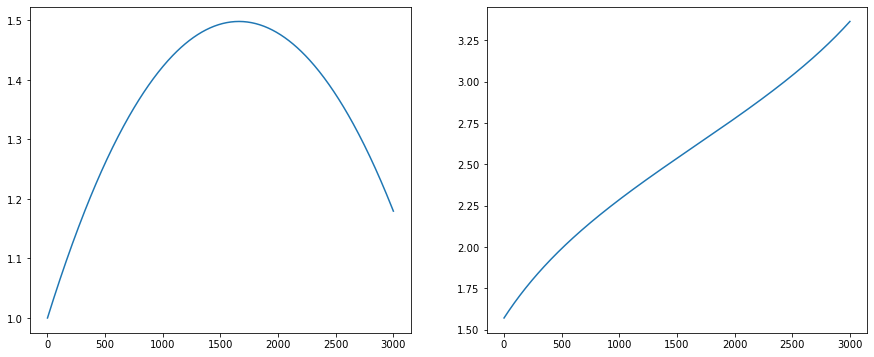

In [21]:
fig1 = plt.figure(figsize=(15,6))
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2)
ax1.plot(t,r)
ax2.plot(t,theta)

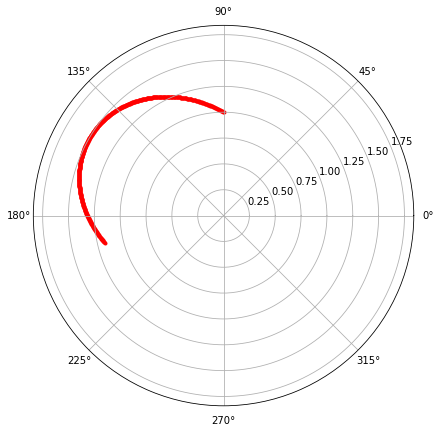

In [22]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(121,projection='polar')
ax1.scatter(theta,r,marker='.',color='r')